In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
list_D=[0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]

In [3]:
data_m_9nei={}
data_rho_9nei={}
mag_9nei={}

data_m_1nei={}
data_rho_1nei={}

for D in list(list_D):
    # m //
    data_m_9nei[D]=pd.read_csv('avg_prof_D/D%s/f_bands_m.dat.gz'%np.round(9*D, decimals=1), sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(1200)])
    data_m_9nei[D]=(data_m_9nei[D].dropna(axis='rows')).values
    
    # rho //
    data_rho_9nei[D]=pd.read_csv('avg_prof_D/D%s/f_bands_rho.dat.gz'%np.round(9*D, decimals=1), sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(1200)])
    data_rho_9nei[D]=(data_rho_9nei[D].dropna(axis='rows')).values
    
    # mag 9
    mag_9nei[D]=pd.read_csv('avg_prof_D/D%s/f_mag.dat'%np.round(9*D, decimals=1), sep=' ')
    
    # m --> 
    data_m_1nei[D]=pd.read_csv('../diag_rhol_D_pupdate/avg_prof_D_v2/D%s/f_bands_m.dat.gz'%D, 
                          sep=' ', index_col=False, 
                          names=[str(a) for a in np.arange(400)])
    data_m_1nei[D]=(data_m_1nei[D].dropna(axis='rows')).values

    # rho --> 
    data_rho_1nei[D]=pd.read_csv('../diag_rhol_D_pupdate/avg_prof_D_v2/D%s/f_bands_rho.dat.gz'%D, 
                          sep=' ', index_col=False, 
                          names=[str(a) for a in np.arange(400)])
    data_rho_1nei[D]=(data_rho_1nei[D].dropna(axis='rows')).values

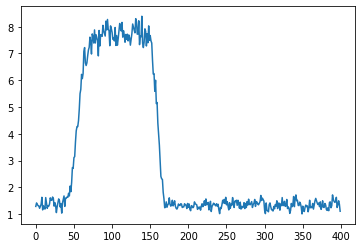

In [42]:
plt.plot(data_rho_1nei[0.1][-1])

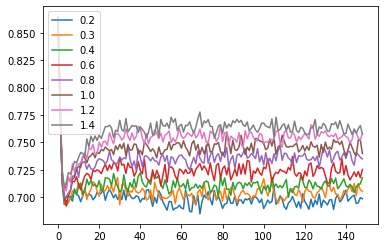

In [154]:
for D in list_D[1:]:
    plt.plot(mag_9nei[D].iloc[:,1], label=D)
plt.legend()

In [4]:
def align_prof(data, L=400, N=10):

    data=pd.DataFrame(data).rolling(window=N).mean().iloc[N-1:].values

    th=np.max(data[-1,:])/2

    t0, x0 = np.where((np.roll(data,5, axis=1)<=th)&(data<=th)&(np.roll(data,-1, axis=1)>=th))
    x1=x0[np.unique(t0, return_index=True)[1]]

    t0, x0 = np.where((data>=th)&(np.roll(data,-1, axis=1)<th)&(np.roll(data,-5, axis=1)<th))
    x2=x0[np.unique(t0, return_index=True)[1]]

    dx=[]
    for t in range(data.shape[0]):
        if x2[t]>x1[t]:
            dx.append(np.int64(0.5*(x2[t]+x1[t]-L)))
        else:
            dx.append(np.int64(0.5*(x2[t]+x1[t])))

    dx=np.array(dx)


    avg_prof=np.mean([np.roll(data[t, :], 
                             -dx[t]) 
                     for t in range(0, data.shape[0]) 
                     if x2[t]>x1[t]+50
                          ]
        , axis=0)
   
    
    return(avg_prof)

In [6]:
N=20
data_mean=pd.DataFrame(data).rolling(window=N).mean().iloc[N-1:].values

In [7]:
data_mean.shape

(60770, 1200)

In [8]:
data = data_m_9nei[1.4]
data=data_mean.copy()
th=np.max(data[-1,:])/2

t0, x0 = np.where((data<=th)&(np.roll(data,-1, axis=1)>=th))
x1=x0[np.unique(t0, return_index=True)[1]]

t0, x0 = np.where((data>=th)&(np.roll(data,-1, axis=1)<th))
x2=x0[np.unique(t0, return_index=True)[1]]

dx=[]
for t in range(data.shape[0]):
    if x2[t]>x1[t]:
        dx.append(np.int64(0.5*(x2[t]+x1[t]-1200)))
    else:
        dx.append(np.int64(0.5*(x2[t]+x1[t])))

dx=np.array(dx)

(0, 500)

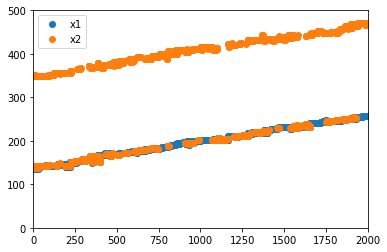

In [9]:
plt.plot(x2, 'o', label='x1')
plt.plot(x1, 'o', label='x2')
plt.legend()
plt.xlim(0,2000)
plt.ylim(0,500)

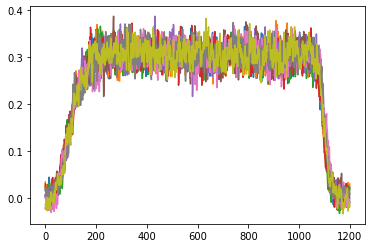

In [10]:
for t in range(0, data.shape[0], 100):
    if x2[t]>x1[t]+50:
        plt.plot(np.roll(data[t, :], -dx[t]))

                     

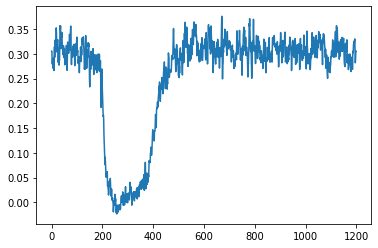

In [11]:
plt.plot(data_mean[1000,:].T);

In [44]:
avg_prof_m_9nei={}
avg_prof_rho_9nei={}

avg_prof_m_1nei={}
avg_prof_rho_1nei={}

for D in list_D:

    # PUT list_D[1:] and uncomment this to get the phase diag for 9nei also
#     avg_prof_m_9nei[D]=align_prof(data_m_9nei[D], L=1200, N=20)
#     avg_prof_rho_9nei[D]=align_prof(data_rho_9nei[D], L=1200, N=20)
    
    avg_prof_m_1nei[D]=align_prof(data_m_1nei[D], L=400, N=20)
    avg_prof_rho_1nei[D]=align_prof(data_rho_1nei[D], L=400, N=20)

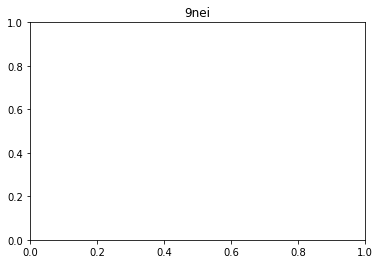

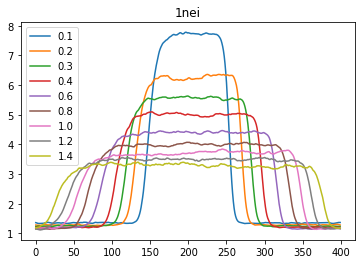

In [45]:
for D in list_D:
    try:
        plt.plot(avg_prof_rho_9nei[D], label=D)

        plt.legend()
    except: pass
    
plt.title('9nei')
    
plt.subplots()
for D in list_D:
    try:
        plt.plot(avg_prof_rho_1nei[D], label=D)

        plt.legend()
    except: pass

plt.title('1nei');

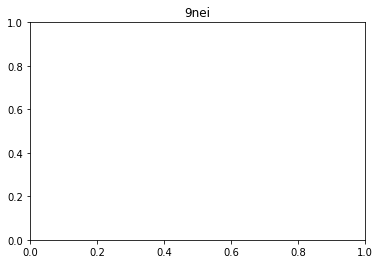

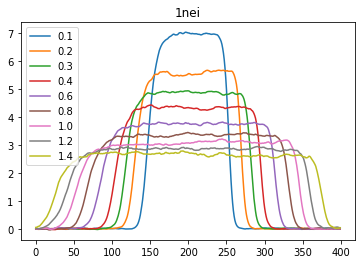

In [46]:
for D in list_D:
    try:
        plt.plot(avg_prof_m_9nei[D], label=D)

        plt.legend()
    except: pass
    
plt.title('9nei')
    
plt.subplots()
for D in list_D:
    try:
        plt.plot(avg_prof_m_1nei[D], label=D)

        plt.legend()
    except: pass

plt.title('1nei');

In [47]:
rhol0_9nei={}
rhog0_9nei={}

for D in list_D:
    try:
        rhol0_9nei[D]=np.mean(avg_prof_rho_9nei[D][570:630])
        rhog0_9nei[D]=np.mean(np.roll(avg_prof_rho_9nei[D], 600)[570:630])
    except: pass

In [49]:
rhol0_1nei={}
rhog0_1nei={}

for D in list_D:
    rhol0_1nei[D]=np.mean(avg_prof_rho_1nei[D][170:230])
    rhog0_1nei[D]=np.mean(np.roll(avg_prof_rho_1nei[D], 200)[180:220])
    

In [51]:
rhol0_1nei

{0.1: 7.71020744047619,
 0.2: 6.233077653608587,
 0.3: 5.583147001987956,
 0.4: 5.000867518596222,
 0.6: 4.408202611739362,
 0.8: 4.006701739226035,
 1.0: 3.701361195674458,
 1.2: 3.494967365657391,
 1.4: 3.323672661217076}

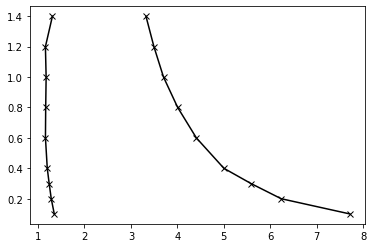

In [54]:
u=list(rhol0_1nei)

plt.plot([rhol0_1nei[D] for D in u], u, 'kx-', label='1nei')
plt.plot([rhog0_1nei[D] for D in u], u, 'kx-')

Text(0, 0.5, '$D$')

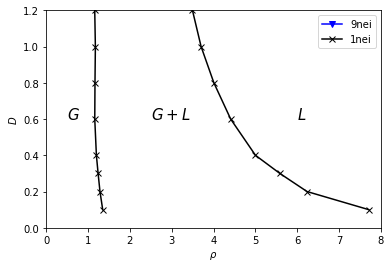

In [55]:
u=list(rhol0_9nei)
plt.plot([9*rhol0_9nei[D] for D in u], u, 'bv-', label='9nei')
plt.plot([9*rhog0_9nei[D] for D in u], u, 'bv-')

u=list(rhol0_1nei)

plt.plot([rhol0_1nei[D] for D in u], u, 'kx-', label='1nei')
plt.plot([rhog0_1nei[D] for D in u], u, 'kx-')

plt.xlim(0,8)
plt.ylim(0,1.2)

plt.annotate(r'$G$', xy=(0.5,0.6), fontsize=15)
plt.annotate(r'$G+L$', xy=(2.5,0.6), fontsize=15)
plt.annotate(r'$L$', xy=(6,0.6), fontsize=15)


plt.legend()

plt.xlabel(r'$\rho$')
plt.ylabel(r'$D$')

#plt.savefig('rho0_D_on_latt.pdf')

## Load off-lattice bands

In [24]:
list_D_off=np.round(np.pi*np.array(list_D), 2)
list_D_off

array([0.31, 0.63, 0.94, 1.26, 1.88, 2.51, 3.14, 3.77, 4.4 ])

In [23]:
data_off={}
for D in list_D_off:
    data_off[D]=pd.read_csv('../../AI2D_off_lattice/diag_D_rho0/avg_prof_D_v3/D%s/f_avg_prof.dat.gz'%D, sep=' ', 
                          index_col=False, names=[str(a) for a in np.arange(708)])
    data_off[D]=(data_off[D].dropna(axis='rows')).values
    print(D)

0.31
0.63
0.94
1.26
1.88
2.51
3.14
3.77


FileNotFoundError: [Errno 2] No such file or directory: '../../AI2D_off_lattice/diag_D_rho0/avg_prof_D_v3/D4.4/f_avg_prof.dat.gz'

In [25]:
x1_off={}
x2_off={}
dx_off={}

for D in list_D_off:
    try:
        th=np.max(data_off[D][-1,:])/2
        print(th)

        t0, x0 = np.where((data_off[D]<=th)&(np.roll(data_off[D],-5, axis=1)>=th))
        x1_off[D]=x0[np.unique(t0, return_index=True)[1]]

        t0, x0 = np.where((data_off[D]>=th)&(np.roll(data_off[D],-5, axis=1)<th))
        x2_off[D]=x0[np.unique(t0, return_index=True)[1]]

        dx_off[D]=[]
        for t in range(data_off[D].shape[0]):
            if x2_off[D][t]>x1_off[D][t]:
                dx_off[D].append(np.int64(0.5*(x2_off[D][t]+x1_off[D][t]-708)))
            else:
                dx_off[D].append(np.int64(0.5*(x2_off[D][t]+x1_off[D][t])))

        dx_off[D]=np.array(dx_off[D])
    

    except: pass

3.03
1.21
1.09
1.0
0.9
0.805
0.755
0.71


In [26]:
avg_prof_off={}

for D in list_D_off:
    print(D)
    try: 
        avg_prof_off[D]=np.mean([np.roll(data_off[D][t, :], 
                                 -dx_off[D][t]) 
                         for t in range(0, data_off[D].shape[0]) 
                         if x2_off[D][t]>x1_off[D][t]+50
                              ]
            , axis=0)

    except: pass

0.31
0.63
0.94
1.26
1.88
2.51
3.14
3.77
4.4


In [27]:
rhol0_off={}
rhog0_off={}

for D in list_D_off:
    try:
        rhol0_off[D]=np.mean(avg_prof_off[D][330:380])
        rhog0_off[D]=np.mean(np.roll(avg_prof_off[D], 354)[330:380])
    except: pass

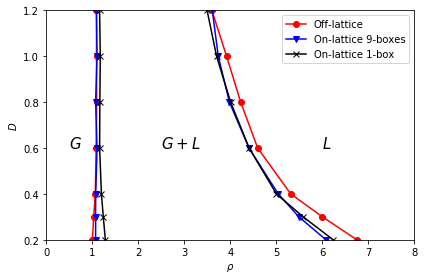

In [40]:
plt.plot([rhol0_off[D]*np.pi for D in list_D_off[1:-1]], list_D[1:-1], 'ro-', label='Off-lattice')
plt.plot([rhog0_off[D]*np.pi for D in list_D_off[1:-1]], list_D[1:-1], 'ro-')

u=list(rhol0_9nei)
plt.plot([9*rhol0_9nei[D] for D in u], u, 'bv-', label='On-lattice 9-boxes')
plt.plot([9*rhog0_9nei[D] for D in u], u, 'bv-')

plt.plot([rhol0_1nei[D] for D in u], u, 'kx-', label='On-lattice 1-box')
plt.plot([rhog0_1nei[D] for D in u], u, 'kx-')

plt.xlim(0,8)
plt.ylim(0.2,1.2)

plt.annotate(r'$G$', xy=(0.5,0.6), fontsize=15)
plt.annotate(r'$G+L$', xy=(2.5,0.6), fontsize=15)
plt.annotate(r'$L$', xy=(6,0.6), fontsize=15)


plt.legend()

plt.xlabel(r'$\rho$')
plt.ylabel(r'$D$')

plt.tight_layout()

plt.savefig('rho0_D_comparison.pdf')


## Stable profiles 

In [57]:
df_9nei=pd.DataFrame(columns=['D', 'phi', 'rhol'])

In [58]:
9*0.675264

6.077376

In [59]:
df_9nei

,D,phi,rhol


In [56]:
plt.plot(df_1nei.D, df_1nei.phi, 'o')
plt.plot(df_1nei.D, df_9nei.phi/3, 'o')

NameError: name 'df_1nei' is not defined

In [60]:
df_9nei.D=list_D[1:]

In [61]:
list_phi=[]
for D in list_D[1:]:
    data=avg_prof_rho_9nei[D]
    th=np.max(data)/2
    x1 = np.where((data<=th)&(np.roll(data,-1)>=th))[0][0]
    x2 = np.where((data>=th)&(np.roll(data,-1)<th))[0][0]
    list_phi.append(x2-x1)

KeyError: 0.2

In [366]:
df_9nei.phi=list_phi
df_9nei.rhol=[rhol0_9nei[D] for D in rhol0_9nei]

___

In [69]:
df_1nei=pd.DataFrame(columns=['D', 'phi', 'rhol'])

In [75]:
df_1nei

,D,phi,rhol
0,0.1,108,7.710207
1,0.2,142,6.233078
2,0.3,168,5.583147
3,0.4,196,5.000868
4,0.6,235,4.408203
5,0.8,270,4.006702
6,1.0,300,3.701361
7,1.2,329,3.494967
8,1.4,360,3.323673


In [71]:
df_1nei.D=list_D

In [73]:
list_phi=[]
for D in list_D:
    data=avg_prof_rho_1nei[D]
    th=np.max(data)/2
    x1 = np.where((data<=th)&(np.roll(data,-1)>=th))[0][0]
    x2 = np.where((data>=th)&(np.roll(data,-1)<th))[0][0]
    list_phi.append(x2-x1)

In [74]:
df_1nei.phi=list_phi
df_1nei.rhol=[rhol0_1nei[D] for D in rhol0_1nei]

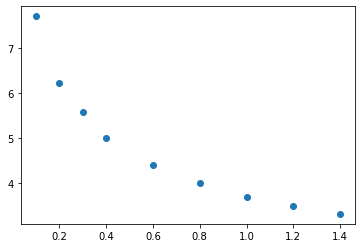

In [79]:
plt.plot(list_D, df_1nei.rhol, 'o')

## garbage

In [20]:
from scipy.optimize import fixed_point

In [21]:
alpha=fixed_point(lambda x : np.tanh(2*x), x0=0.5)

In [22]:
1/alpha

1.0443820337608334

In [27]:
u=np.array(u)

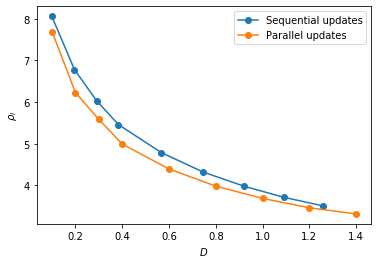

In [28]:
plt.plot(u*(1-u/(4*u+1+np.exp(2))), [rhol0_s[D] for D in u], 'o-', label='Sequential updates')
plt.plot(u, [rhol0_p[D]for D in u], 'o-', label='Parallel updates')
plt.legend()
plt.xlabel(r'$D$');
plt.ylabel(r'$\rho_l$');

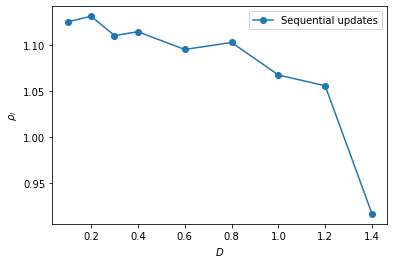

In [89]:
plt.plot(u, [rhog0_s[D]/rhog0_p[D] for D in u], 'o-', label='Sequential updates')
#plt.plot(list_D, [ for D in list_D], 'o-', label='Parallel updates')
plt.legend()
plt.xlabel(r'$D$');
plt.ylabel(r'$\rho_l$');

# $\langle m \rangle$

In [85]:
mag_seq={}
mag_par={}
for D in list_D:
    print(D)
    mag_seq[D]=pd.read_csv('../diag_rhol_D_supdate/avg_prof_D_v2/D%s/f_mag.dat'%D, sep=' ', names=['t', 'm']).m.values[-50:].mean()
    try:
        mag_par[D]=pd.read_csv('avg_prof_D_v2/D%s/f_mag.dat'%D, sep=' ', names=['t', 'm']).m.values[-50:].mean()
    except:pass

0.1
0.2
0.3
0.4
0.6
0.8
1.0
1.2
1.4


In [86]:
mag_par

{0.1: 0.60469098,
 0.2: 0.6397413399999999,
 0.3: 0.6583876399999999,
 0.4: 0.67888496,
 0.6: 0.70418634,
 0.8: 0.7255469600000001,
 1.0: 0.7396983,
 1.2: 0.7524533400000002,
 1.4: 0.7632057600000001}

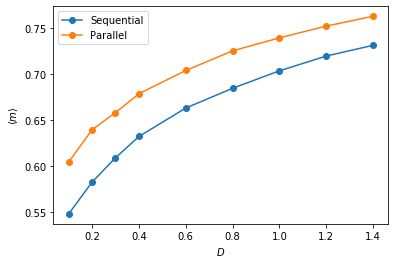

In [87]:
plt.plot(list_D, [mag_seq[D] for D in list_D], 'o-', label='Sequential')
plt.plot(list_D, [mag_par[D] for D in list_D], 'o-', label='Parallel')

plt.xlabel(r'$D$')
plt.ylabel(r'$\langle m \rangle$')

plt.legend()